In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\gupta\OneDrive\Desktop\Assignment\phishing_site_urls.csv")
df.head(100)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
95,rsaxena.5gbfree.com/facebook.html,bad
96,steamcommunity-giveaway.my3gb.com,bad
97,steamglfts.h16.ru,bad
98,steamglfts.hut2.ru/,bad


In [3]:
df.shape

(549346, 2)

In [4]:
df.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [5]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [6]:
df.duplicated().sum()

42150

In [7]:
#feature engineering

df['url_length'] = df['URL'].apply(len)

df['num_dots'] = df['URL'].apply(lambda x: x.count('.'))

df['ip'] = df['URL'].apply(lambda x: 1 if re.search(r'(\d{1,3}\.){3}\d{1,3}', x) else 0)

df['has_at'] = df['URL'].apply(lambda x: 1 if '@' in x else 0)
df['has_dash'] = df['URL'].apply(lambda x: 1 if '-' in x else 0)

df['https'] = df['URL'].apply(lambda x: 1 if x.startswith('https://') else 0)

df['digits'] = df['URL'].apply(lambda x: sum(c.isdigit() for c in x))

shorteners = ['bit.ly', 'tinyurl', 'goo.gl', 'ow.ly', 't.co']
df['is_shortened'] = df['URL'].apply(lambda x: 1 if any(s in x for s in shorteners) else 0)

suspicious_keywords = ['login', 'verify', 'update', 'account', 'bank', 'secure', 'webscr', 'signin', 'submit']
df['has_suspicious_keyword'] = df['URL'].apply(lambda x: 1 if any(word in x.lower() for word in suspicious_keywords) else 0)

In [8]:
df

,URL,Label,url_length,num_dots,ip,has_at,has_dash,https,digits,is_shortened,has_suspicious_keyword
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,225,6,0,0,1,0,58,0,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,81,5,0,0,1,0,1,0,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,177,7,0,0,1,0,47,0,1
3,mail.printakid.com/www.online.americanexpress....,bad,60,6,0,0,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,116,1,0,0,1,0,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,15,3,1,0,0,0,11,0,0
549342,apple-checker.org/,bad,18,1,0,0,1,0,0,0,0
549343,apple-iclods.org/,bad,17,1,0,0,1,0,0,0,0
549344,apple-uptoday.org/,bad,18,1,0,0,1,0,0,0,0


In [9]:
#label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['label_encoded'] = le.fit_transform(df['Label'])

In [10]:
df

,URL,Label,url_length,num_dots,ip,has_at,has_dash,https,digits,is_shortened,has_suspicious_keyword,label_encoded
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,225,6,0,0,1,0,58,0,1,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,81,5,0,0,1,0,1,0,1,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,177,7,0,0,1,0,47,0,1,0
3,mail.printakid.com/www.online.americanexpress....,bad,60,6,0,0,0,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,116,1,0,0,1,0,21,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,15,3,1,0,0,0,11,0,0,0
549342,apple-checker.org/,bad,18,1,0,0,1,0,0,0,0,0
549343,apple-iclods.org/,bad,17,1,0,0,1,0,0,0,0,0
549344,apple-uptoday.org/,bad,18,1,0,0,1,0,0,0,0,0


In [11]:
if 'has_suspicious_keywords' in df.columns:
    df = df.drop(columns=['has_suspicious_keywords'])


In [12]:
df

,URL,Label,url_length,num_dots,ip,has_at,has_dash,https,digits,is_shortened,has_suspicious_keyword,label_encoded
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,225,6,0,0,1,0,58,0,1,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,81,5,0,0,1,0,1,0,1,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,177,7,0,0,1,0,47,0,1,0
3,mail.printakid.com/www.online.americanexpress....,bad,60,6,0,0,0,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,116,1,0,0,1,0,21,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,15,3,1,0,0,0,11,0,0,0
549342,apple-checker.org/,bad,18,1,0,0,1,0,0,0,0,0
549343,apple-iclods.org/,bad,17,1,0,0,1,0,0,0,0,0
549344,apple-uptoday.org/,bad,18,1,0,0,1,0,0,0,0,0


In [13]:
#Standardizing the values 
from sklearn.preprocessing import StandardScaler
features = df.drop(columns=['URL', 'Label'])


X = features[[
    'url_length', 'num_dots', 'ip', 'has_at', 'has_dash',
    'https', 'digits', 'is_shortened', 'has_suspicious_keyword'
]]
y = features['label_encoded']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_scaled

array([[ 3.92326434,  2.59976957, -0.12308239, ...,  4.59959035,
        -0.24819288,  3.765623  ],
       [ 0.6813383 ,  1.9395415 , -0.12308239, ..., -0.32572523,
        -0.24819288,  3.765623  ],
       [ 2.84262233,  3.25999764, -0.12308239, ...,  3.64909085,
        -0.24819288,  3.765623  ],
       ...,
       [-0.75951772, -0.70137079, -0.12308239, ..., -0.41213427,
        -0.24819288, -0.26556031],
       [-0.73700434, -0.70137079, -0.12308239, ..., -0.41213427,
        -0.24819288, -0.26556031],
       [-0.75951772, -0.70137079, -0.12308239, ..., -0.41213427,
        -0.24819288, -0.26556031]])

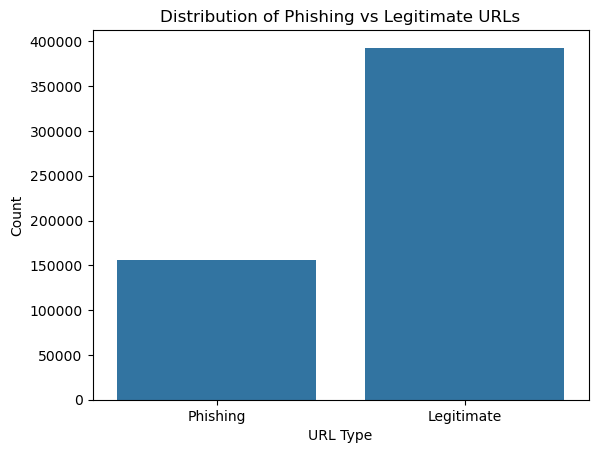

In [15]:
import seaborn as sns
sns.countplot(x='label_encoded', data=df)
plt.xticks([0, 1], ['Phishing', 'Legitimate'])
plt.title('Distribution of Phishing vs Legitimate URLs')
plt.xlabel('URL Type')
plt.ylabel('Count')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression()
# clf.fit(X_train, y_train)

In [18]:
# y_pred = clf.predict(X_test)
# y_pred

In [19]:
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
print("Accuracy:", accuracy_score(y_test, rfc_pred))
print("\nClassification Report:\n", classification_report(y_test, rfc_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rfc_pred))

Accuracy: 0.8335669427505233

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.53      0.65     31200
           1       0.84      0.95      0.89     78670

    accuracy                           0.83    109870
   macro avg       0.83      0.74      0.77    109870
weighted avg       0.83      0.83      0.82    109870


Confusion Matrix:
 [[16618 14582]
 [ 3704 74966]]


In [23]:
import joblib

joblib.dump(rfc, 'rfc.pkl')


['rfc.pkl']

In [24]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [25]:
#Extracting columns
def extract_features(url):
    return {
        'url_length': len(url),
        'num_dots': url.count('.'),
        'ip': 1 if re.search(r'(\d{1,3}\.){3}\d{1,3}', url) else 0,
        'has_at': 1 if '@' in url else 0,
        'has_dash': 1 if '-' in url else 0,
        'https': 1 if url.startswith('https') else 0,
        'digits': sum(c.isdigit() for c in url),
        'is_shortened': 1 if any(short in url.lower() for short in ['bit.ly', 'tinyurl', 'goo.gl', 'ow.ly', 't.co']) else 0,
        'has_suspicious_keyword': 1 if any(kw in url.lower() for kw in ['login', 'verify', 'update', 'account', 'bank', 'secure', 'webscr', 'signin', 'submit']) else 0,
    }

In [26]:
#Loading model and scaler
model = joblib.load('rfc.pkl')
scaler = joblib.load('scaler.pkl')

In [28]:
#Result

url =  "http://secure.yourbank.verify.info"
# url = "https://www.amazon.in/"

features = extract_features(url)

df_features = pd.DataFrame([features])

scaled = scaler.transform(df_features)

prediction = model.predict(scaled)[0]

if prediction == 0:
    print("Phishing URL Detected!")
else:
    print("Legitimate URL.")

Phishing URL Detected!
